In [ ]:
#When using data variables include factionalism different numbers of levels, 
#the information resulting from the decision tree [English] be biased for recipes that contain more levels.
#Accounts can be quite complex, especially if many values ​​are uncertain and / or have been linked to many of the outputs.

In [1]:
%matplotlib inline


Automatically created module for IPython interactive environment
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= =

[1, 3]
[[ 3.5  0.2]
 [ 3.   0.2]
 [ 3.2  0.2]
 [ 3.1  0.2]
 [ 3.6  0.2]
 [ 3.9  0.4]
 [ 3.4  0.3]
 [ 3.4  0.2]
 [ 2.9  0.2]
 [ 3.1  0.1]
 [ 3.7  0.2]
 [ 3.4  0.2]
 [ 3.   0.1]
 [ 3.   0.1]
 [ 4.   0.2]
 [ 4.4  0.4]
 [ 3.9  0.4]
 [ 3.5  0.3]
 [ 3.8  0.3]
 [ 3.8  0.3]
 [ 3.4  0.2]
 [ 3.7  0.4]
 [ 3.6  0.2]
 [ 3.3  0.5]
 [ 3.4  0.2]
 [ 3.   0.2]
 [ 3.4  0.4]
 [ 3.5  0.2]
 [ 3.4  0.2]
 [ 3.2  0.2]
 [ 3.1  0.2]
 [ 3.4  0.4]
 [ 4.1  0.1]
 [ 4.2  0.2]
 [ 3.1  0.1]
 [ 3.2  0.2]
 [ 3.5  0.2]
 [ 3.1  0.1]
 [ 3.   0.2]
 [ 3.4  0.2]
 [ 3.5  0.3]
 [ 2.3  0.3]
 [ 3.2  0.2]
 [ 3.5  0.6]
 [ 3.8  0.4]
 [ 3.   0.3]
 [ 3.8  0.2]
 [ 3.2  0.2]
 [ 3.7  0.2]
 [ 3.3  0.2]
 [ 3.2  1.4]
 [ 3.2  1.5]
 [ 3.1  1.5]
 [ 2.3  1.3]
 [ 2.8  1.5]
 [ 2.8  1.3]
 [ 3.3  1.6]
 [ 2.4  1. ]
 [ 2.9  1.3]
 [ 2.7  1.4]
 [ 2.   1. ]
 [ 3.   1.5]
 [ 2.2  1. ]
 [ 2.9  1.4]
 [ 2.9  1.3]
 [ 3.1  1.4]
 [ 3.   1.5]
 [ 2.7  1. ]
 [ 2.2  1.5]
 [ 2.5  1.1]
 [ 3.2  1.8]
 [ 2.8  1.3]
 [ 2.5  1.5]
 [ 2.8  1.2]
 [ 2.9  1.3]
 [ 3.   1.4]
 [ 2.

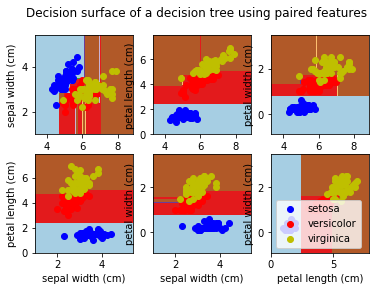

In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
print(iris.DESCR)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    print(pair)
   
    y = iris.target
   

    # Train
    print(X)
    print(y)
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
     

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()